In [48]:
# ဒီလိုင်းက matplotlib graph တွေကို jupyter notebook အတွင်းမှာ ပြနိုင်အောင်လို့  
# ပုံမှန်အားဖြင့်က jupyter notebook ရဲ့ အပေါ်ဆုံးမှာ ရေးထည့်ထားလေ့ရှိတယ်။  
%matplotlib inline 

# Mean Squared Error

မနေ့က Error Function ကို မိတ်ဆက်ပေးခဲ့တယ်။ နာမည်အကြီးဆုံး error တွက်တဲ့ function ကို ပြောပါဆိုရင်  
"Mean Squared Error" လို့ပဲ ဆရာ ပြောရလိမ့်မယ်။  

# $E = \frac{1}{2}\sum_{k}(y_k-t_k)^2 $

ဒီနေရာမှာ $y_k$ က neural network ရဲ့ output ဖြစ်ပြီးတော့၊ $t_k$ က reference data ဖြစ်တယ်။  

ဥပမာ။ ။ ကျွန်တော်တို့က "သုည" ကနေ "ကိုး" ဂဏန်းကို handwriting recognition လုပ်နေတယ်လို့ ဆိုကြပါစို့

y = \[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0\]  
t = \[0, 0, 1, 0, 0, 0, 0, 0, 0, 0\]

In [49]:
import numpy as np

def Mean_Squared_Error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [50]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]  
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Mean_Squared_Error(np.array(y), np.array(t))

0.09750000000000003

# Cross Entropy Error

Mean Squared Error လိုပဲ နောက်ထပ် သိထားသင့်တဲ့ error ကို တွက်ချက်တဲ့ formula က "Cross Entropy Error" ပါ။  
# $E = -\sum_{k}t_k \ logy_k  $  

ဒီနေရာမှာ သုံးထားတဲ့ log က natural logrithm ဖြစ်ပြီးတော့ approximately equal to 2.718281828459  
python code အနေနဲ့ ရေးပြပါ ဆိုရင်  

In [51]:
def Cross_Entropy_Error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]  
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [52]:
Cross_Entropy_Error(np.array(y), np.array(t))

0.510825457099338

model output prediction ရဲ့ တန်ဖိုးတွေကို ပြောင်းပြီးတော့ တွက်ခိုင်းကြည့်ရအောင်

In [53]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.6, 0.1, 0.6, 0.0]  

In [54]:
Cross_Entropy_Error(np.array(y), np.array(t))

2.302584092994546

# Mini-Batch Learning  

Machine Learning မှာ model ရဲ့ output (i.e. y) နဲ့ training data ထဲမှာရှိနေတဲ့ မှန်ကန်တဲ့အဖြေ (i.e. t) ကို Error Function တစ်ခုခုကို တိုက်စစ်ရင်း learning လုပ်တာ။ Neural Network မော်ဒယ်ရဲ့ weight တွေကို update လုပ်တာ။  

မော်ဒယ်ကနေ ထွက်လာသမျှ y ကို မှန်ကန်တဲ့အဖြေ t နဲ့ တိုက်စစ်ဖို့လိုအပ်ပေမဲ့၊ လက်တွေ့မှာက တပြိုင်တည်းမှာ အားလုံးကို တိုက်စစ်ဖို့က မဖြစ်နိုင် တဲ့ အခြေအနေတွေရှိတယ်။ အထူးသဖြင့် training data က တအားများတဲ့ အခါမှာ။ အဲဒါကြောင့် "Mini-Batch Learning" ဆိုတဲ့ ပုံစံနဲ့ learning လုပ်ပြီး၊ မော်ဒယ်ကို ပိုကောင်းအောင် ပြင်ပြင်သွားတယ်။    

အထက်မှာ သင်ပေးခဲ့တဲ့ Cross Entropy Error ကို Mini-Batch Learning လုပ်တဲ့ ကိစ္စကို ဖော်မြူလာနဲ့ ချရေးရရင် အောက်ပါအတိုင်း ဖြစ်လိမ့်မယ်။  

# $E = -\frac{1}{n}\sum_{n}\sum_{k}t_nk \ logy_{nk}  $  

အဲဒီအတွက်က Python coding လုပ်တဲ့ အခါမှာ training data ထဲက အသုတ်လိုက်၊ အသုတ်လိုက် ဆွဲယူဖို့အတွက်က np.random.choice(10000, 10) ဆိုတဲ့ ပုံစံမျိုးနဲ့ ရေးတယ်။   

Cross Entropy Error တွက်တဲ့ အပိုင်းကို batch size (တစ်ခါကို ဘယ်လောက်တွက်ပါဆိုတဲ့ ဆိုက်) နဲ့ တွက်တဲ့ ပုံစံမျိုး ပရိုဂရမ်ရေးကြည့်မယ်ဆိုရင်  

In [55]:
#batch_size ကိုကြိုသတ်မှတ်ထားပြီးတော့

def Cross_Entropy_Error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size), t])) / batch_size

# Gradient Descent 

Gradient descent ဆိုတာကို သိဖိုလိုအပ်တယ်။  
Theory ကိုအလွယ် ရှင်းပြရရင် local minimum value ကို ပေးထားတဲ့ function ပေါ်မူတည်ပြီး တဖြေးဖြေးချင်း အတိုး၊ အလျှော့လုပ်ပြီးတော့ ရှာတဲ့ algorithm ပါ။ လွယ်တဲ့ Quadratic equation တစ်ခုရဲ့ graph ကို ထုတ်ပြီးတော့ Gradient descent ရဲ့ အလုပ်လုပ်ပုံကို စဉ်းစားကြည့်ရအောင်။    

In [44]:
x_quad = [n/10 for n in range(0, 100)]
y_quad = [(n-4)**2+5 for n in x_quad]

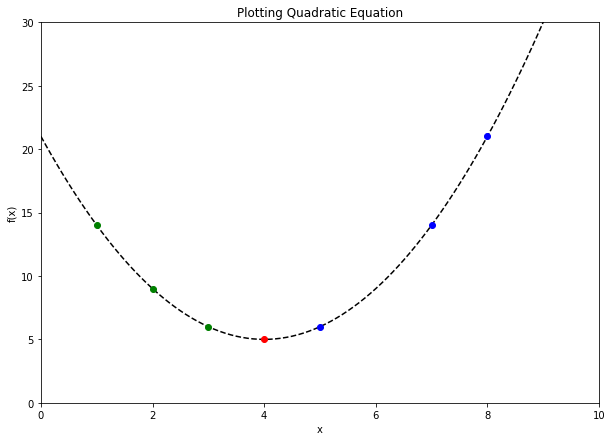

In [58]:
plt.figure(figsize = (10,7))
plt.plot(x_quad, y_quad, 'k--')
plt.axis([0,10,0,30])
plt.plot([1, 2, 3], [14, 9, 6], 'go')
plt.plot([5, 7, 8],[6, 14, 21], 'bo')
plt.plot(4, 5, 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plotting Quadratic Equation')

# First testing your tensorflow is working or not  

အရင်ဆုံး ခင်ဗျားတို့ရဲ့စက်ထဲမှာရှိတဲ့ tensorflow က အလုပ်လုပ်လို့ ရပြီလား test လုပ်ကြည့်ရအောင်

In [63]:
import tensorflow as tf

In [64]:
hello = tf.constant("Hello, world!")
sess = tf.Session()

In [65]:
print(sess.run(hello))

b'Hello, world!'


# Introduction to Tensorflow Working Approach

In [66]:
# build computational graph
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

addition = tf.add(a, b)

# initialize variables
init = tf.initialize_all_variables()

# create session and run the graph
with tf.Session() as sess:
    sess.run(init)
    print ("Addition: %i" % sess.run(addition, feed_dict={a: 2, b: 3}))

# close session
sess.close()


Instructions for updating:
Use `tf.global_variables_initializer` instead.
Addition: 5


# When I have time, I will show gradianet decsent calculation with python code

# OR gate model with Tensorflow

In [59]:
import numpy as np
import tensorflow as tf

'''
Model Setting
'''
tf.set_random_seed(0)  # Setting random seed

w = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.nn.sigmoid(tf.matmul(x, w) + b)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

'''
Model learning
'''
# OR gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

# Initialization
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Learning
for epoch in range(200):
    sess.run(train_step, feed_dict={
        x: X,
        t: Y
    })

'''
Classification
'''
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X,
    t: Y
})
prob = y.eval(session=sess, feed_dict={
    x: X
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

/home/lar/anaconda3/envs/py3.6.2/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.22355038]
 [0.9142595 ]
 [0.9142595 ]
 [0.99747425]]


# Testing with Moons Dataset

In [67]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(0)
tf.set_random_seed(1234)

'''
Training Data, Test Data Preparation
'''
N = 300  # Data Size
X, y = datasets.make_moons(N, noise=0.3)
Y = y.reshape(N, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)


'''
Model Building
'''
num_hidden = 3  # Number of Dimension of Hidden Layer
# num_hidden = 2

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

# Input - Hidden
W = tf.Variable(tf.truncated_normal([2, num_hidden]))
b = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

# Hidden - Output
V = tf.Variable(tf.truncated_normal([num_hidden, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

'''
Model Learning
'''
batch_size = 20
n_batches = N // batch_size

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(500):
    X_, Y_ = shuffle(X_train, Y_train)

    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size

        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })

'''
Evaluation
'''
accuracy_rate = accuracy.eval(session=sess, feed_dict={
    x: X_test,
    t: Y_test
})
print('accuracy: ', accuracy_rate)

/home/lar/anaconda3/envs/py3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


accuracy:  0.93333334


# Training and Testing with MNIST Orignial Data

In [61]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(0)
tf.set_random_seed(1234)

'''
MNIST data preparation
'''
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

n = len(mnist.data)
N = 10000  # We will use a part of MNIST dataset
train_size = 0.8
indices = np.random.permutation(range(n))[:N]  # Random number of image

X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]  # 1-of-K 

X_train, X_test, Y_train, Y_test =\
    train_test_split(X, Y, train_size=train_size)

'''
Model Setting
'''
n_in = len(X[0])  # 784
n_hidden = 200
n_out = len(Y[0])  # 10

x = tf.placeholder(tf.float32, shape=[None, n_in])
t = tf.placeholder(tf.float32, shape=[None, n_out])

# Input - Hidden
W0 = tf.Variable(tf.truncated_normal([n_in, n_hidden], stddev=0.01))
b0 = tf.Variable(tf.zeros([n_hidden]))
h0 = tf.nn.relu(tf.matmul(x, W0) + b0)

# Hidden - Hidden
W1 = tf.Variable(tf.truncated_normal([n_hidden, n_hidden], stddev=0.01))
b1 = tf.Variable(tf.zeros([n_hidden]))
h1 = tf.nn.relu(tf.matmul(h0, W1) + b1)

W2 = tf.Variable(tf.truncated_normal([n_hidden, n_hidden], stddev=0.01))
b2 = tf.Variable(tf.zeros([n_hidden]))
h2 = tf.nn.relu(tf.matmul(h1, W2) + b2)

W3 = tf.Variable(tf.truncated_normal([n_hidden, n_hidden], stddev=0.01))
b3 = tf.Variable(tf.zeros([n_hidden]))
h3 = tf.nn.relu(tf.matmul(h2, W3) + b3)

# Hidden - Output
W4 = tf.Variable(tf.truncated_normal([n_hidden, n_out], stddev=0.01))
b4 = tf.Variable(tf.zeros([n_out]))
y = tf.nn.softmax(tf.matmul(h3, W4) + b4)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), axis=1))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

'''
Model Learning
'''
epochs = 50
batch_size = 200

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

n_batches = (int)(N * train_size) // batch_size

for epoch in range(epochs):
    X_, Y_ = shuffle(X_train, Y_train)

    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size

        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })

    # Calculating loss with Cross Entropy 
    loss = cross_entropy.eval(session=sess, feed_dict={
        x: X_,
        t: Y_
    })
    
    # Evaluation with Accuracy
    acc = accuracy.eval(session=sess, feed_dict={
        x: X_,
        t: Y_
    })
    print('epoch:', epoch, ' loss:', loss, ' accuracy:', acc)

'''
Prediction Accuracy
'''
accuracy_rate = accuracy.eval(session=sess, feed_dict={
    x: X_test,
    t: Y_test
})
print('accuracy: ', accuracy_rate)

/home/lar/anaconda3/envs/py3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


epoch: 0  loss: 2.3021867  accuracy: 0.11525
epoch: 1  loss: 2.3018122  accuracy: 0.11525
epoch: 2  loss: 2.3014212  accuracy: 0.11525
epoch: 3  loss: 2.3009894  accuracy: 0.11525
epoch: 4  loss: 2.3004873  accuracy: 0.11525
epoch: 5  loss: 2.299864  accuracy: 0.11525
epoch: 6  loss: 2.2990499  accuracy: 0.11525
epoch: 7  loss: 2.297917  accuracy: 0.11525
epoch: 8  loss: 2.2962322  accuracy: 0.11525
epoch: 9  loss: 2.2934604  accuracy: 0.118375
epoch: 10  loss: 2.2881455  accuracy: 0.19625
epoch: 11  loss: 2.2749128  accuracy: 0.285625
epoch: 12  loss: 2.21967  accuracy: 0.275875
epoch: 13  loss: 1.955585  accuracy: 0.236625
epoch: 14  loss: 1.8271803  accuracy: 0.30775
epoch: 15  loss: 1.3660227  accuracy: 0.4705
epoch: 16  loss: 1.190868  accuracy: 0.548625
epoch: 17  loss: 0.7621454  accuracy: 0.736
epoch: 18  loss: 0.61233056  accuracy: 0.80725
epoch: 19  loss: 0.550963  accuracy: 0.82975
epoch: 20  loss: 0.5032972  accuracy: 0.850625
epoch: 21  loss: 0.43840474  accuracy: 0.87525
